In [ ]:
import pandas as pd        # for handling the data
import numpy as np         # for numerical calculations
import matplotlib.pyplot as plt  # for plots
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap                # for feature importance


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:


# Correct path to CSV
csv_file = "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Loading the data
data = pd.read_csv(csv_file)

# Printing the data
data.head()
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Converting TotalCharges to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Filling missing values with median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-2733564694.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [ ]:
data = data.drop(['customerID'], axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_cols:
    data[col] = le.fit_transform(data[col])


In [ ]:
data = pd.get_dummies(data, columns=['MultipleLines','InternetService','OnlineSecurity',
                                     'OnlineBackup','DeviceProtection','TechSupport',
                                     'StreamingTV','StreamingMovies','Contract','PaymentMethod'])


In [ ]:
# Features (all columns except Churn)
X = data.drop('Churn', axis=1)

# Target variable
y = data['Churn']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)  # 1000 iterations
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8211497515968772
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.801277501774308
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
from xgboost import XGBClassifier

# Creating the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:32:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7877927608232789
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
# Checking column types
print(X_train.dtypes.value_counts())


bool       31
int64       6
float64     3
Name: count, dtype: int64


In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


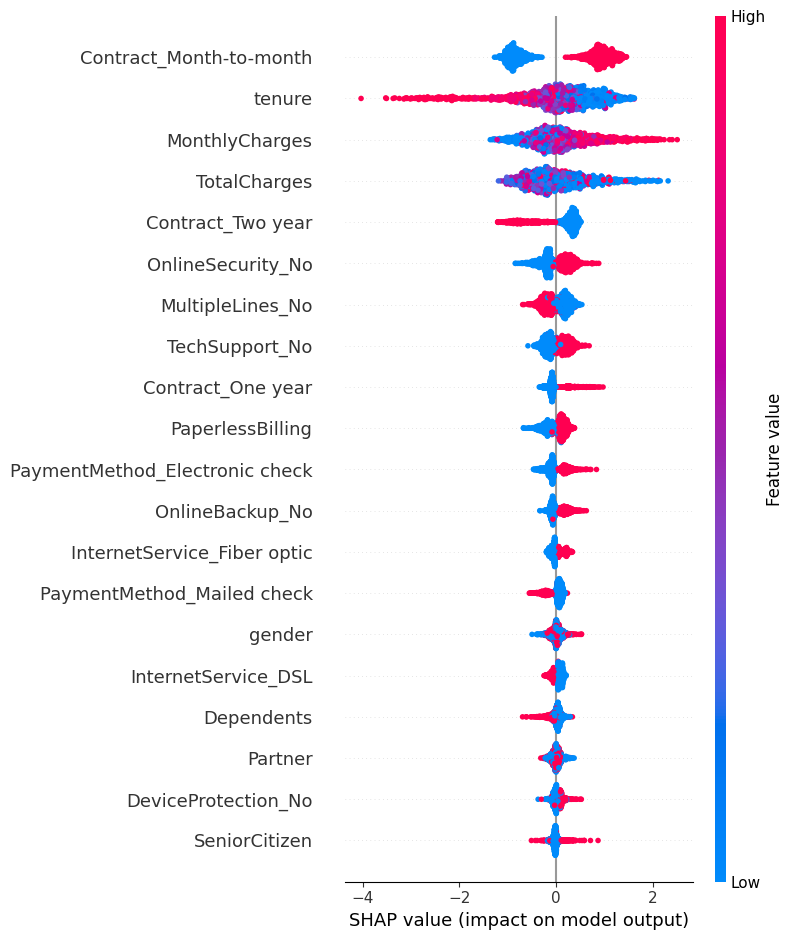

In [ ]:
import shap

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


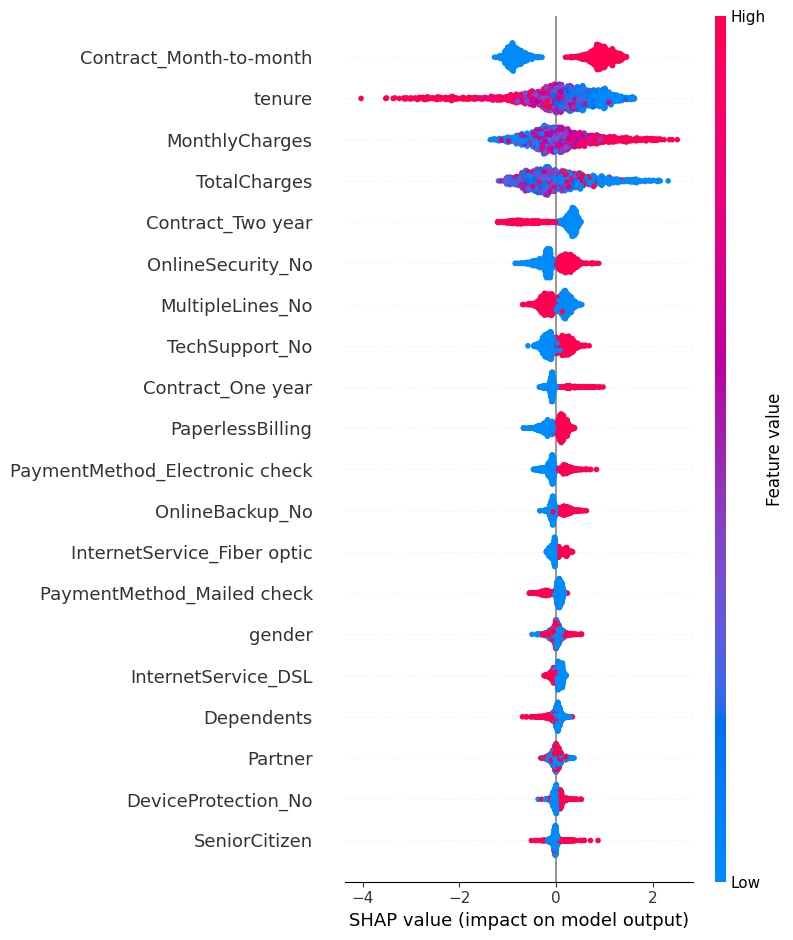

In [ ]:


# Creating SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [ ]:
# explainer already created
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Extracting numpy values
shap_values_array = shap_values.values



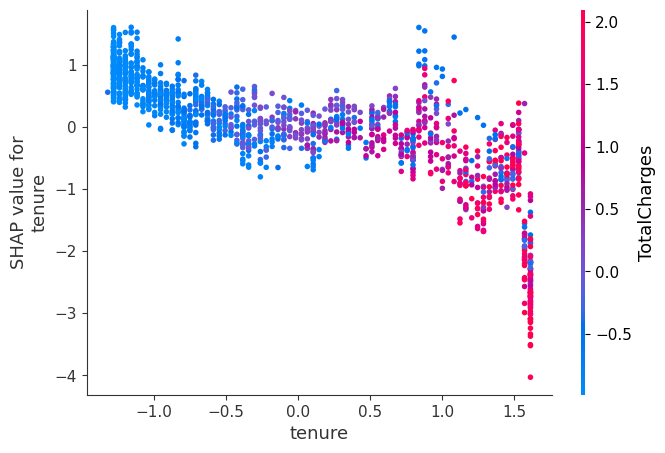

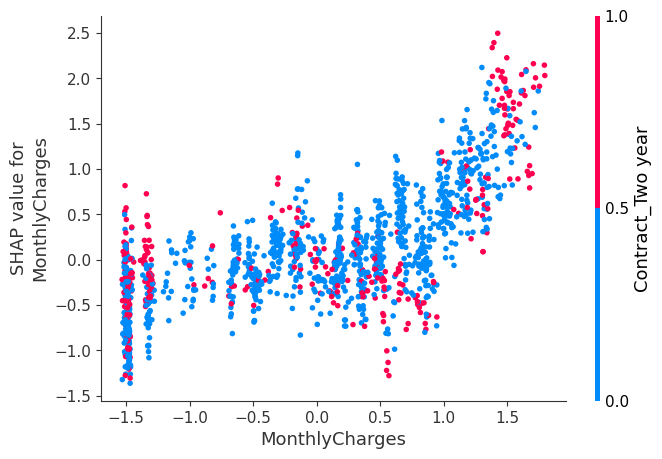

In [ ]:
shap.dependence_plot(
    "tenure",                # feature name
    shap_values_array,       # SHAP values array
    X_test                   # feature dataset
)

shap.dependence_plot(
    "MonthlyCharges",
    shap_values_array,
    X_test
)


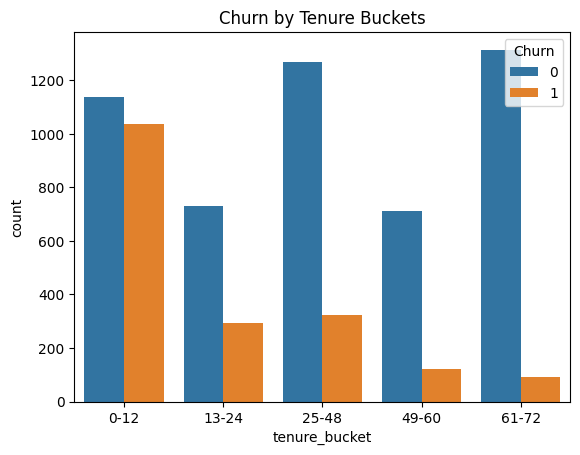

In [ ]:

sns.countplot(x='tenure_bucket', hue='Churn', data=data)
plt.title("Churn by Tenure Buckets")
plt.show()

